# **Project Name**    -Uber Supply Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Yash Dhonde


# **Project Summary -**

To analyze Uber ride request data and identify patterns of demand-supply imbalance, focusing on when and where ride requests are not fulfilled due to cancellations or unavailability of cars.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To identify the trends in Uber Supply Demand and solving the problem of demand supply gap of Uber.

#### **Define Your Business Objective?**

To understand about the demand gap of Uber bookings and their Supply.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

In [22]:
!pip install seaborn

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Dataset Loading

In [41]:
# Load Dataset
df=pd.read_csv('Uber Request Data (2).csv')

In [42]:
df['Request id'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Request id, Length: 6745, dtype: bool

In [43]:
from datetime import datetime as dt

### Dataset First View

In [44]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11:51:00,13:00:00
1,867,Airport,1.0,Trip Completed,17:57:00,18:47:00
2,1807,City,1.0,Trip Completed,09:17:00,09:58:00
3,2532,Airport,1.0,Trip Completed,21:08:00,22:03:00
4,3112,City,1.0,Trip Completed,08:33:16,09:25:47


### Dataset Rows & Columns count

In [45]:
# Dataset Rows & Columns count
df.shape
print("no of rows is",df.shape[0])
print("no of columns is",df.shape[1])

no of rows is 6745
no of columns is 6


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [24]:
# Dataset Duplicate Value Count
df.duplicated().count()

np.int64(6745)

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

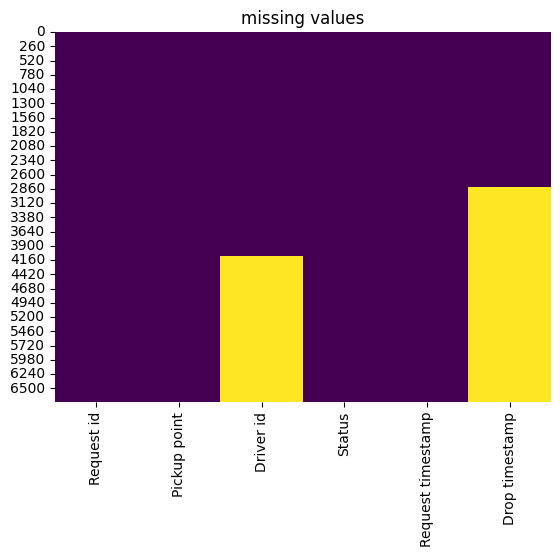

In [28]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("missing values")
plt.show()

### What did you know about your dataset?

The dataset consist of 6745 rows and 6 columns.Only Driver Id and Drop timestamp has Null values.Mainly the data type of columns is Object.only Request id has data type int(64) and Driver id has datatype float.

## ***2. Understanding Your Variables***

In [46]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

"Request id" column consists of 6745 rows.and Driver id column consists of 4095 rows as other rows consists of Null values.The min for both  col is 1 as id count starts from 1.The max for Request id is 6766 and for Driver id is 300.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df['Request id'].unique()

array([ 619,  867, 1807, ..., 6751, 6754, 6753])

In [19]:
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [20]:
df['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [21]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
df['Request timestamp'].dtype

dtype('O')

In [68]:
df['req hour'] = pd.to_datetime(df['Request timestamp'], format='%H:%M:%S').dt.hour


In [69]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour
0,619,Airport,1.0,Trip Completed,11:51:00,13:00:00,11
1,867,Airport,1.0,Trip Completed,17:57:00,18:47:00,17
2,1807,City,1.0,Trip Completed,09:17:00,09:58:00,9
3,2532,Airport,1.0,Trip Completed,21:08:00,22:03:00,21
4,3112,City,1.0,Trip Completed,08:33:16,09:25:47,8


In [70]:
# Write your code to make your dataset analysis ready.
df['req hour']

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req hour, Length: 6745, dtype: int32

In [71]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour
0,619,Airport,1.0,Trip Completed,11:51:00,13:00:00,11
1,867,Airport,1.0,Trip Completed,17:57:00,18:47:00,17
2,1807,City,1.0,Trip Completed,09:17:00,09:58:00,9
3,2532,Airport,1.0,Trip Completed,21:08:00,22:03:00,21
4,3112,City,1.0,Trip Completed,08:33:16,09:25:47,8


In [72]:
conditions = [
    df['req hour'] < 6,
    df['req hour'] < 12,
    df['req hour'] < 18,
    df['req hour'] >= 18
]

# Define corresponding values
choices = ['late night', 'morning', 'afternoon', 'night']

# Apply conditions
df['req'] = np.select(conditions, choices,default='unknown')
df

   
    

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour,req
0,619,Airport,1.0,Trip Completed,11:51:00,13:00:00,11,morning
1,867,Airport,1.0,Trip Completed,17:57:00,18:47:00,17,afternoon
2,1807,City,1.0,Trip Completed,09:17:00,09:58:00,9,morning
3,2532,Airport,1.0,Trip Completed,21:08:00,22:03:00,21,night
4,3112,City,1.0,Trip Completed,08:33:16,09:25:47,8,morning
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23:49:03,NaN,23,night
6741,6752,Airport,NaN,No Cars Available,23:50:05,NaN,23,night
6742,6751,City,NaN,No Cars Available,23:52:06,NaN,23,night
6743,6754,City,NaN,No Cars Available,23:54:39,NaN,23,night


In [120]:
data=df[df['Status']=='Trip Completed']


In [125]:
data.head()


data['Request'] = pd.to_datetime(data['Request timestamp'], format='%H:%M:%S')

data['Drop'] = pd.to_datetime(data['Drop timestamp'], format='%H:%M:%S')

# Calculate time difference
data['Trip Duration'] = data['Drop'] - data['Request']

# Get difference in minutes
data['Trip Minutes'] = data['Trip Duration'].dt.total_seconds() / 60


C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_796\2011048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Request'] = pd.to_datetime(data['Request timestamp'], format='%H:%M:%S')
C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_796\2011048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Drop'] = pd.to_datetime(data['Drop timestamp'], format='%H:%M:%S')
C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_796\2011048.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [126]:
data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour,req,Request,Drop,Trip Duration,Trip Minutes
0,619,Airport,1.0,Trip Completed,11:51:00,13:00:00,11,morning,1900-01-01 11:51:00,1900-01-01 13:00:00,0 days 01:09:00,69.000000
1,867,Airport,1.0,Trip Completed,17:57:00,18:47:00,17,afternoon,1900-01-01 17:57:00,1900-01-01 18:47:00,0 days 00:50:00,50.000000
2,1807,City,1.0,Trip Completed,09:17:00,09:58:00,9,morning,1900-01-01 09:17:00,1900-01-01 09:58:00,0 days 00:41:00,41.000000
3,2532,Airport,1.0,Trip Completed,21:08:00,22:03:00,21,night,1900-01-01 21:08:00,1900-01-01 22:03:00,0 days 00:55:00,55.000000
4,3112,City,1.0,Trip Completed,08:33:16,09:25:47,8,morning,1900-01-01 08:33:16,1900-01-01 09:25:47,0 days 00:52:31,52.516667


In [129]:
data['Trip Minutes'].max()

np.float64(1413.0333333333333)

In [77]:
data['trip time']=data['Drop timestamp']-data['Request timestamp']

C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_796\600609849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip time']=data['Drop timestamp']-data['Request timestamp']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Pickup Points')

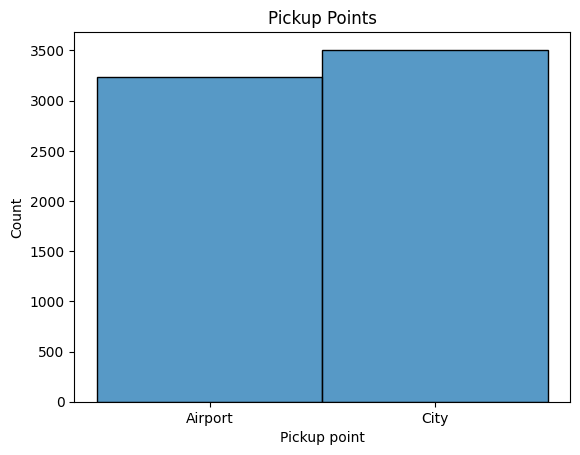

In [78]:
# Chart - 1 visualization 
sns.histplot(df['Pickup point'])
plt.title("Pickup Points")

##### 1. Why did you pick the specific chart?

I used this chart to show how much diiference is their in between the bookings from Airport And City.

##### 2. What is/are the insight(s) found from the chart?

Pickup Airport has very less bookings as compared City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.As bookings for City are more we can provide more services in city area rather than providing for Airport.

#### Chart - 2

In [81]:
# Chart - 2 visualization code


<Axes: xlabel='Pickup point', ylabel='count'>

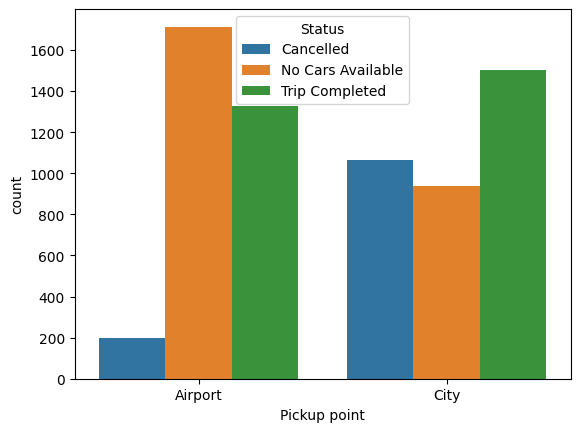

In [80]:
status=df.groupby(['Status','Pickup point'])['Pickup point'].count()
status_df=status.reset_index(name='count')



sns.barplot(data=status_df,x='Pickup point',y='count',hue='Status')

##### 1. Why did you pick the specific chart?

To show the variance of status and how pickup point and status is related.

##### 2. What is/are the insight(s) found from the chart?

For Airport the cancelation of bookings is much less as compared to city.The non avilablity of car is much biggerproblem for airport than for city.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The non availablity of cars in airport region causes the loss of company much high as compared to the city.More cars should be made avilable in the airport region to increase the profit of company.

#### Chart - 3

Text(0.5, 1.0, 'Driver And complted Trips')

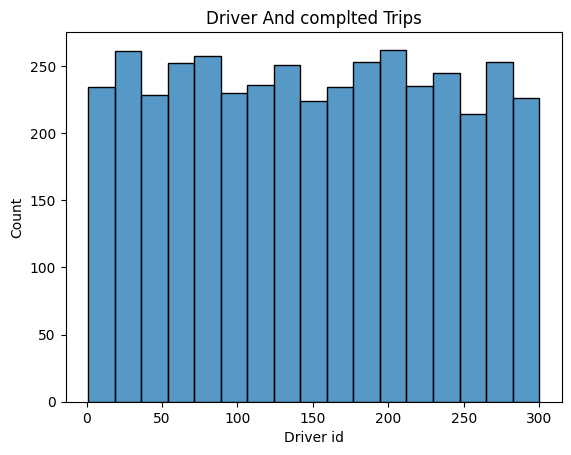

In [84]:
# Chart - 3 visualization code
sns.histplot(df['Driver id'])

plt.title('Driver And complted Trips')

##### 1. Why did you pick the specific chart?

As I want to learn about the drivers and their freq of trips.

##### 2. What is/are the insight(s) found from the chart?

Drivers above the id 250 to 260 have less experience as compared to other drivers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By using good drivers with good experience can increase the rate of completion of rides.

In [97]:
df.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Text(0.5, 1.0, 'Status')

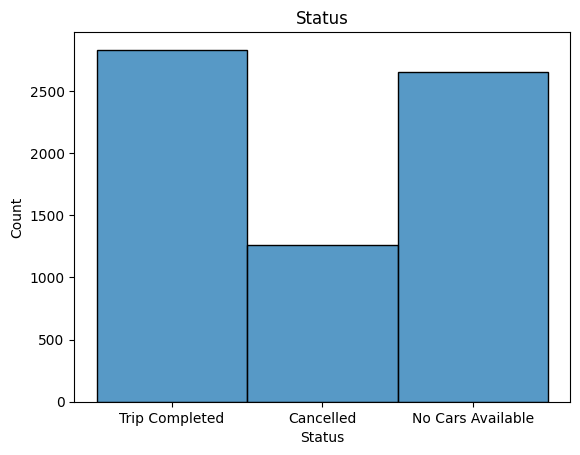

In [5]:
sns.histplot(df['Status'])
plt.title('Status')

In [6]:


data['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True,errors='coerce')
data['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True,errors='coerce')
data['Request']=data['Request timestamp'].dt.time
data['Drop']=data['Drop timestamp'].dt.time

NameError: name 'data' is not defined

It shows us about the status of ride.from which we can demonstrate about the proportion of the rides that are completed,which are cancelled and which are failed as no cars avilable.

##### 2. What is/are the insight(s) found from the chart?

This shows us about why most of the rides are unsuccessful .The unavilablity of cars is the greatest reason behind this.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.By improving the no of cars in those regions can lead to the successful completion of rides.

#### Chart - 5

Text(0.5, 1.0, 'rides and corresponding time')

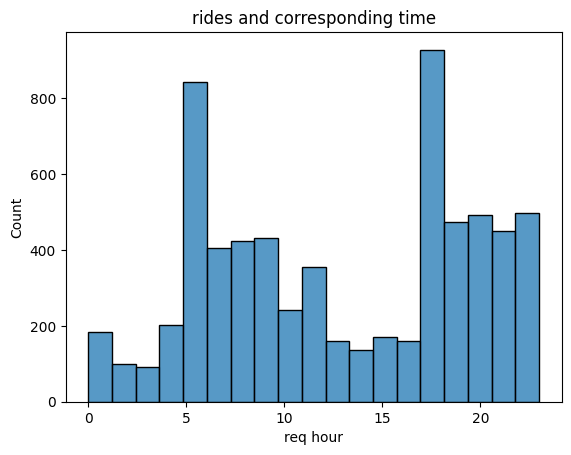

In [26]:
# Chart - 5 visualization code
sns.histplot(df['req hour'])
plt.title("rides and corresponding time")

##### 1. Why did you pick the specific chart?

For the purpose of understanding the number off bookings at specific time in a day.

##### 2. What is/are the insight(s) found from the chart?

At a time of 6 and 17 the amount of bookings are high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.By learning about the time phase having more bookings can help increasing the amount of cars in specific time Which can increase the profit of the company.

#### Chart - 6

<Axes: xlabel='Pickup point', ylabel='count'>

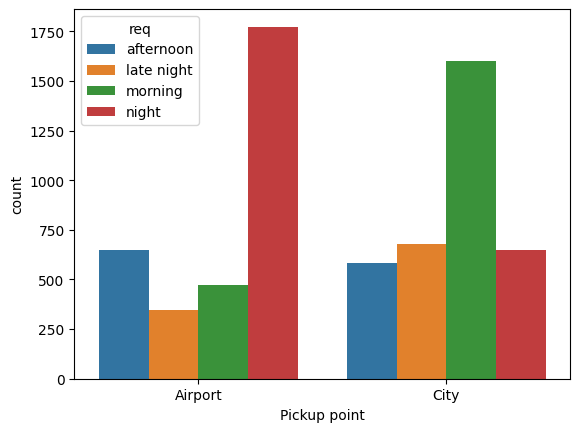

In [36]:
# Chart - 6 visualization code
pickup=df.groupby(['Pickup point','req'])['req'].count().reset_index(name='count')
sns.barplot(data=pickup,x='Pickup point',y='count',hue='req')

##### 1. Why did you pick the specific chart?

It helps to understand about the amount of bookings at perticular time slot for perticular pickup point.

##### 2. What is/are the insight(s) found from the chart?

The amount of bookings at Airport region is highest during night time .for city the amount of bookings are highest at morning time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.providing more no of cabs on pickup having more demand and on the time having more demand canresult in incrementing the profit.

#### Chart - 7

<Axes: xlabel='Status', ylabel='count'>

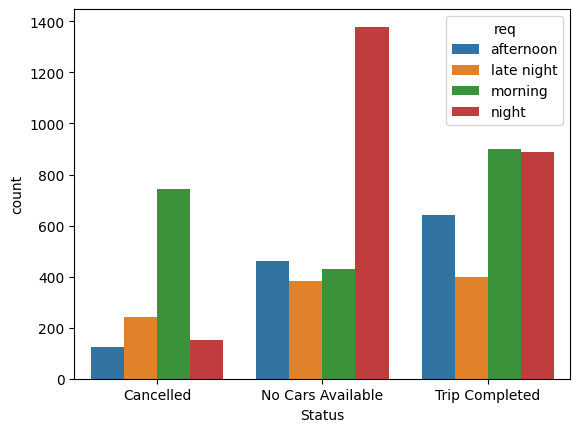

In [41]:
# Chart - 7 visualization code
status=df.groupby(['Status','req'])['req'].count().reset_index(name='count')
sns.barplot(data=status,x='Status',y='count',hue='req')

##### 1. Why did you pick the specific chart?

It helps to understand no. of bookings at every timephase along with their staus of whether cancelled,no avilablity of cars and completion.

##### 2. What is/are the insight(s) found from the chart?

Increasing the amount of cabs in night time can resolvethe problemof unavilablity of cars.we can reduce no of cabs during morning  region as its rate of cancellation is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By changing the amount of cars from morning phase and night phase can turn into increasing the successfulcompletion of rides.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


Text(0.5, 1.0, 'count of rides at each timephase')

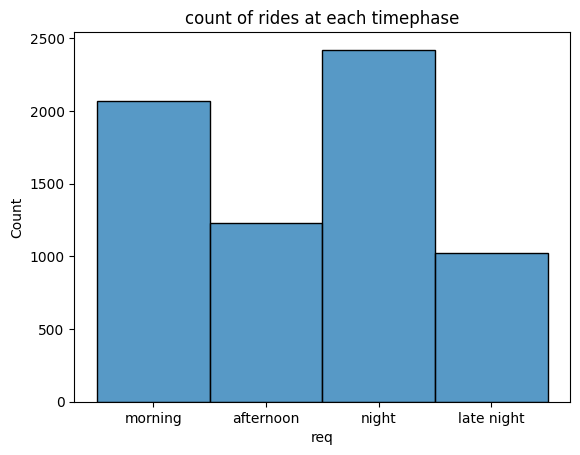

In [44]:
sns.histplot(x=df['req'])
plt.title('count of rides at each timephase')

##### 1. Why did you pick the specific chart?

to understand the amount of bookings ateach timephase.

##### 2. What is/are the insight(s) found from the chart?

the no of bookings are highest at night timephase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.by increasing cabs at night phase resultinto more profits.

#### Chart - 9

In [82]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req hour', 'req'],
      dtype='object')

In [85]:
# Chart - 9 visualization code

req=df.groupby('req hour')['Status'].count().reset_index(name='count')
req

,req hour,count
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203
5,5,445
6,6,398
7,7,406
8,8,423
9,9,431


Text(0.5, 1.0, 'Bookings in a day')

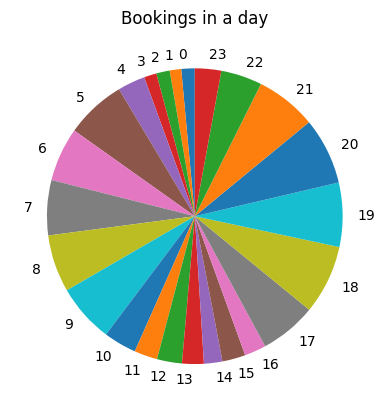

In [97]:
plt.pie(req['count'],labels=req['req hour'],startangle=90)
plt.title('Bookings in a day')

##### 1. Why did you pick the specific chart?

Helps us to show amount of bookings at every time from 0 to 23.

##### 2. What is/are the insight(s) found from the chart?

Major amount of bookings come from time 5,6,7,8,18,19,20.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.By learning about the major bookings we can focus on this timelines to increase our profits.

#### Chart - 10

In [99]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

<Axes: xlabel='Pickup point', ylabel='Status'>

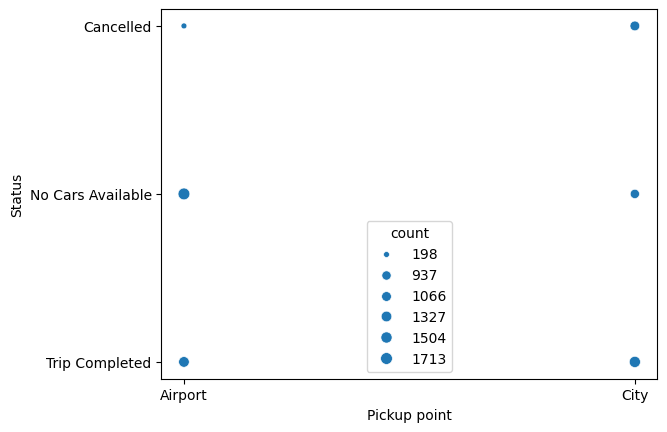

In [111]:
Request=df.groupby(['Pickup point','Status'])['req'].count().reset_index(name='count')
sns.scatterplot(data=Request,x='Pickup point',y='Status',size='count')

##### 1. Why did you pick the specific chart?

shows about the corelation of Pickup point and Status of rides.

##### 2. What is/are the insight(s) found from the chart?

Airport is highly related to the problem of unavilabity of cars which is the reason for the loss of the company.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increasing the amount of cabs at Airport region can increase the profit.

#### Chart - 11

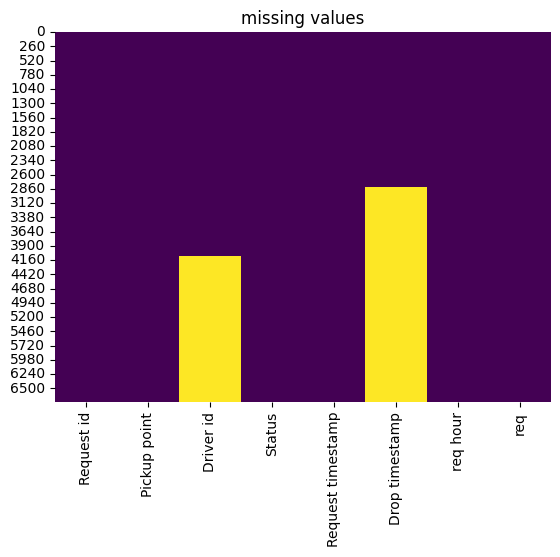

In [115]:
# Chart - 11 visualization code
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("missing values")
plt.show()

##### 1. Why did you pick the specific chart?

shows us about the range of null values for all columns.

##### 2. What is/are the insight(s) found from the chart?

Only two columns contains null values namely Driver id and Drop timestamp.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

absenseof values at Driver column show that the cars are not avilable.And the absense of drop shows about the non completion of rides.

#### Chart - 12

Text(0.5, 1.0, 'Pickup ans req')

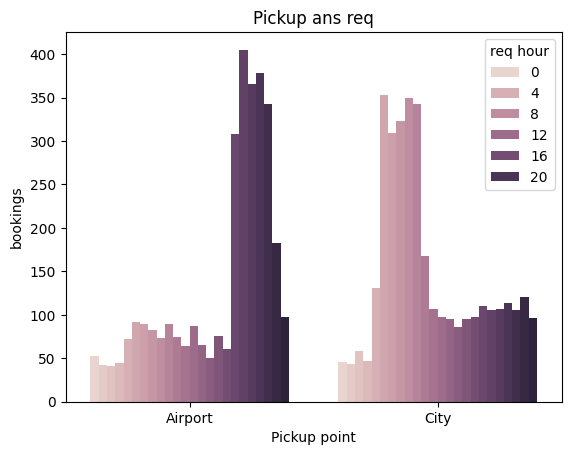

In [133]:
# Chart - 12 visualization code
pickup=df.groupby(['Pickup point','req hour'])['req hour'].count().reset_index(name='bookings')
sns.barplot(data=pickup,x='Pickup point',y='bookings',hue='req hour')
plt.title('Pickup ans req')


##### 1. Why did you pick the specific chart?

shows us about no of bookings at any time in a day and at airport and city.

##### 2. What is/are the insight(s) found from the chart?

The bookingsare highest at airport at time range 16and 18.In City they are highest at range 4,6.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.in this time ranges providing required amount of cars can be good for profits.

#### Chart - 13

C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_796\1795661089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trip Minutes']=abs(data['Trip Minutes'])


Text(0.5, 1.0, 'time taken and rides')

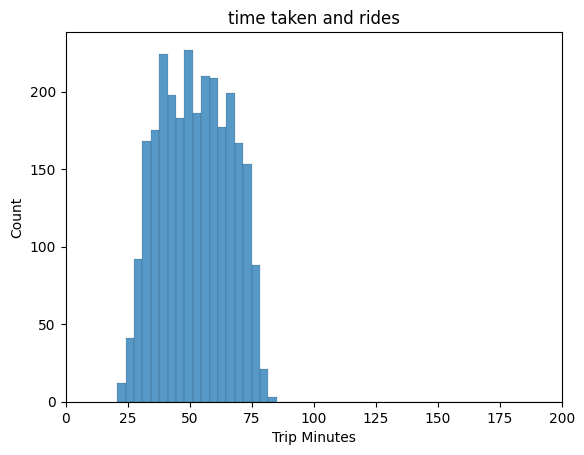

In [130]:
# Chart - 13 visualization code
data['Trip Minutes']=abs(data['Trip Minutes'])
sns.histplot(data['Trip Minutes'])
plt.xlim(0,200)
plt.title('time taken and rides')


##### 1. Why did you pick the specific chart?

shows us about the trip compltion time and bookings.

##### 2. What is/are the insight(s) found from the chart?

From this we can figure out  many trips are completed in how much time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With this we can figure no of trips complted in how much time.

#### Chart - 14 - Correlation Heatmap

In [131]:
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req hour', 'req', 'Request',
       'Drop', 'Trip Duration', 'Trip Minutes'],
      dtype='object')

<Axes: >

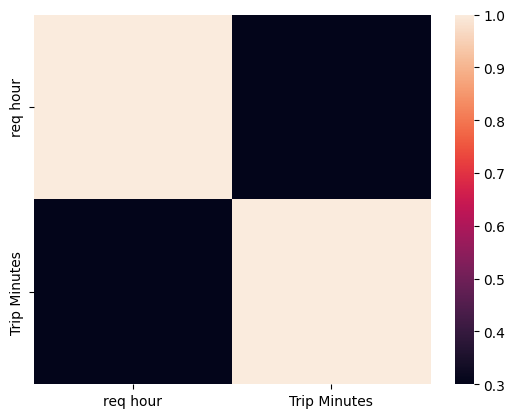

In [132]:
# Correlation Heatmap visualization code
data=data[['req hour','Trip Minutes']]
corelation=data.corr()
sns.heatmap(corelation)

##### 1. Why did you pick the specific chart?

It shows us about the realtion between req hour and the time required to complete the ride.

##### 2. What is/are the insight(s) found from the chart?

req hour and the time required to complete the trip are highly corelated .

#### Chart - 15 - Pair Plot

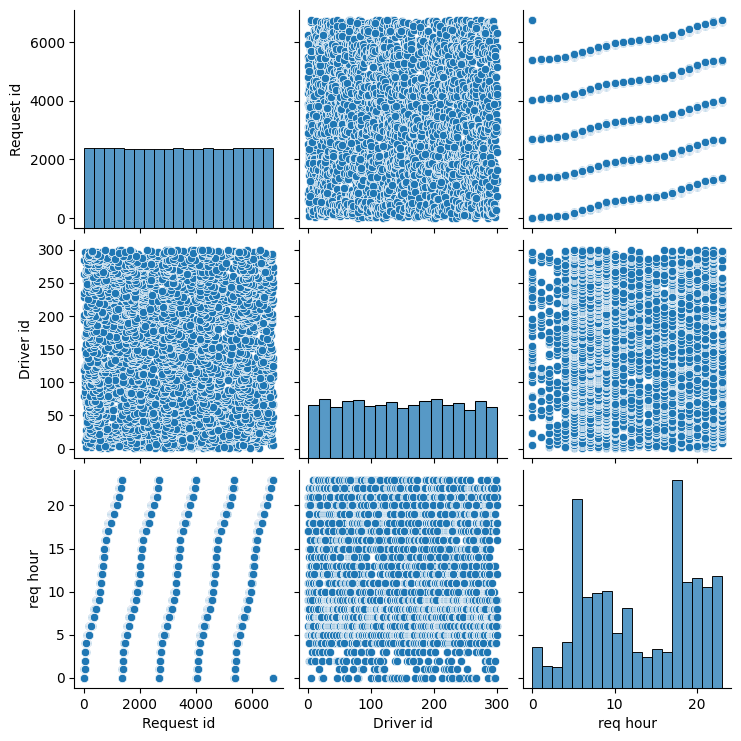

In [114]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

To show the relation between Request id,Driver,Requesthour.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

problem we need to solve is the demand gap of uber.By increasing amount of cabs in certain region can help to solve this problem.amount of bookings are high at airport at night time ,the problem is non avilablity of cars by making cars avilable can help to increase the sales. In city morning has high demand of cars but the problem of non avilablity is responsible for loss.By increasing the amount of cars this problem can be solve.

# **Conclusion**

By providing more cars during morning time in City area can be pofit making.for airport during evening providing more carscan beprofit making.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***